In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from skimage.transform import resize
import xml
import xml.etree.ElementTree as ET
import warnings
import math
from scipy import ndimage

2025-08-27 16:12:32.907992: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-27 16:12:33.759746: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-27 16:12:33.759813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-27 16:12:33.853719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-27 16:12:34.051273: I tensorflow/core/platform/cpu_feature_guar

In [2]:
def chose_xml_and_jpeg(file_location):
    # list all files in location
    list_of_all_files = os.listdir(file_location)
    # sort files
    list_of_all_files.sort()
    # separate xml and jpeg files
    all_xml_files = [file for file in list_of_all_files if file.split('.')[-1] == 'xml']
    all_xml_files.sort()
    all_jpeg_files = [file for file in list_of_all_files if file not in all_xml_files]
    all_jpeg_files.sort()
    # get the final 20 files
    chosen_xml_files = all_xml_files[-20:]
    chosen_jpeg_files = all_jpeg_files[-20:]
    # make sure the xml and jpeg files correspond to each other?
    mean = np.mean([file.split('.')[0] for file in chosen_xml_files] == [file.split('.')[0] for file in chosen_jpeg_files])

    # chose the required files only - notice that for the inputs we do not need to create their density maps - therefore we do not need the xml files
    task_specific_image_files = chosen_jpeg_files[:13]
    return(task_specific_image_files, mean)

In [3]:
# write a function for reading the images

def read_all_images(file_names, im_path):
    all_images = []
    for file in file_names:
        joined_path = os.path.join(im_path, file)
        read_image = plt.imread(joined_path)
        plt.imshow(read_image)
        plt.show()
        all_images.append(read_image)

    return all_images

In [4]:
# Do a function for this

def create_and_stack_subwindows(im_height, im_width, stride, kernel_size, n_channels, im_list):
    # initiate an empty list
    catch_all_subwindows = []
    for i in range(0, im_height, stride):
        for j in range(0, im_width, stride):
            local_list_at_subimage_sequence_level= []
            for im_file in im_list:
                chosen_window = im_file[i:i+kernel_size, j:j+kernel_size, :]
                # resize the window
                chosen_window = resize(chosen_window, (kernel_size, kernel_size ,n_channels))
                local_list_at_subimage_sequence_level.append(chosen_window)
            catch_all_subwindows.append(local_list_at_subimage_sequence_level)
    # stack all these together
    Stacked_subwindows = np.stack(catch_all_subwindows)
    return(Stacked_subwindows)

In [ ]:
# Block 0103

In [ ]:
block_0103 = '../../../Spring_2024/S_lab_TasselNet/Block_3_TN/Block_3_images_and_xml'

In [ ]:
# get all image files
all_im_files_0103, mean_0103 =  chose_xml_and_jpeg(block_0103)

In [ ]:
all_im_files_0103, mean_0103

In [ ]:
# read the images and plot them
read_images_0103 = read_all_images(all_im_files_0103, block_0103)

In [ ]:
len(read_images_0103)

In [ ]:
read_images_0103[0].shape

In [ ]:
im_height = read_images_0103[0].shape[0]
im_width = read_images_0103[0].shape[1]
stride = 16
kernel_size = 100
n_channels = 3
stack_block_0103 = create_and_stack_subwindows(im_height, im_width, stride, kernel_size, n_channels, read_images_0103)

In [ ]:
# examine the shape for this
stack_block_0103.shape

In [ ]:
np.save("data/test_input_sub_images/test_data_blk_0103.npy", stack_block_0103)

In [ ]:
# sanity check
load_test_blk_0103 = np.load("data/test_input_sub_images/test_data_blk_0103.npy")
np.mean(load_test_blk_0103 == stack_block_0103)

In [ ]:
# Block 0104

In [ ]:
block_0104 = '../../../Spring_2024/S_lab_TasselNet/Block_4_TN/Block_4_images_and_xml'

In [ ]:
# get all image files
all_im_files_0104, mean_0104 =  chose_xml_and_jpeg(block_0104)

In [ ]:
# all_im_files_0104, mean_0104

In [ ]:
# read the images and plot them
read_images_0104 = read_all_images(all_im_files_0104, block_0104)

In [ ]:
# for file in read_images_0104:
#     print(file.shape)

In [ ]:
# create the subwindow stack
stack_block_0104 = create_and_stack_subwindows(im_height, im_width, stride, kernel_size, n_channels, read_images_0104)

In [ ]:
# examine the shape for this
stack_block_0104.shape

In [ ]:
# save the test data

In [ ]:
np.save("data/test_input_sub_images/test_data_blk_0104.npy", stack_block_0104)

In [ ]:
# sanity check
load_test_blk_0104 = np.load("data/test_input_sub_images/test_data_blk_0104.npy")
np.mean(load_test_blk_0104 == stack_block_0104)

In [ ]:
# Block 0105

In [ ]:
block_0105 = '../../../Spring_2024/S_lab_TasselNet/Block_5_TN/Block_5_images_and_xml'

In [ ]:
# get all image files
all_im_files_0105, mean_0105 =  chose_xml_and_jpeg(block_0105)

In [ ]:
# all_im_files_0105, mean_0105

In [ ]:
# read the images and plot them
read_images_0105 = read_all_images(all_im_files_0105, block_0105)

In [ ]:
# for file in read_images_0105:
#     print(file.shape)

In [ ]:
im_height = read_images_0105[0].shape[0]
im_width = read_images_0105[0].shape[1]
stride = 16
kernel_size = 100
n_channels = 3

In [ ]:
# create the subwindow stack
stack_block_0105 = create_and_stack_subwindows(im_height, im_width, stride, kernel_size, n_channels, read_images_0105)

In [ ]:
# examine the shape for this
stack_block_0105.shape

In [ ]:
# save the test data

In [ ]:
np.save("data/test_input_sub_images/test_data_blk_0105.npy", stack_block_0105)

In [ ]:
# sanity check
load_test_blk_0105 = np.load("data/test_input_sub_images/test_data_blk_0105.npy")
np.mean(load_test_blk_0105 == stack_block_0105)

In [ ]:
# Block 0106

In [ ]:
block_0106 = '../../../Spring_2024/S_lab_TasselNet/Block_6_TN/Block_6_images_and_xml'

In [ ]:
# get all image files
all_im_files_0106, mean_0106 =  chose_xml_and_jpeg(block_0106)

In [ ]:
# all_im_files_0106, mean_0106

In [ ]:
# read the images and plot them
read_images_0106 = read_all_images(all_im_files_0106, block_0106)

In [ ]:
# for file in read_images_0106:
#     print(file.shape)

In [ ]:
im_height = read_images_0106[0].shape[0]
im_width = read_images_0106[0].shape[1]
stride = 16
kernel_size = 100
n_channels = 3

In [ ]:
# create the subwindow stack
stack_block_0106 = create_and_stack_subwindows(im_height, im_width, stride, kernel_size, n_channels, read_images_0106)

In [ ]:
# examine the shape for this
stack_block_0106.shape

In [ ]:
# save the test data

In [ ]:
np.save("data/test_input_sub_images/test_data_blk_0106.npy", stack_block_0106)

In [ ]:
# sanity check
load_test_blk_0106 = np.load("data/test_input_sub_images/test_data_blk_0106.npy")
np.mean(load_test_blk_0106 == stack_block_0106)

In [ ]:
# Block 0201

In [ ]:
block_0201 = '../../../Spring_2024/S_lab_TasselNet/Block_7_TN/Block_7_images_and_xml'

In [ ]:
# get all image files
all_im_files_0201, mean_0201 =  chose_xml_and_jpeg(block_0201)

In [ ]:
all_im_files_0201, mean_0201

In [ ]:
# read the images and plot them
read_images_0201 = read_all_images(all_im_files_0201, block_0201)

In [ ]:
# for file in read_images_0201:
#     print(file.shape)

In [ ]:
im_height = read_images_0201[0].shape[0]
im_width = read_images_0201[0].shape[1]
stride = 16
kernel_size = 100
n_channels = 3

In [ ]:
# create the subwindow stack
stack_block_0201 = create_and_stack_subwindows(im_height, im_width, stride, kernel_size, n_channels, read_images_0201)

In [ ]:
# examine the shape for this
stack_block_0201.shape

In [ ]:
# save the test data

In [ ]:
np.save("data/test_input_sub_images/test_data_blk_0201.npy", stack_block_0201)

In [ ]:
# sanity check
load_test_blk_0201 = np.load("data/test_input_sub_images/test_data_blk_0201.npy")
np.mean(load_test_blk_0201 == stack_block_0201)

In [ ]:
# Block 0202

In [ ]:
block_0202 = '../../../Spring_2024/S_lab_TasselNet/Block_8_TN/Block_8_images_and_xml'

In [ ]:
# get all image files
all_im_files_0202, mean_0202 =  chose_xml_and_jpeg(block_0202)

In [ ]:
# all_im_files_0202, mean_0202

In [ ]:
# read the images and plot them
read_images_0202 = read_all_images(all_im_files_0202, block_0202)

In [ ]:
# for file in read_images_0202:
#     print(file.shape)

In [ ]:
im_height = read_images_0202[0].shape[0]
im_width = read_images_0202[0].shape[1]
stride = 16
kernel_size = 100
n_channels = 3

In [ ]:
# create the subwindow stack
stack_block_0202 = create_and_stack_subwindows(im_height, im_width, stride, kernel_size, n_channels, read_images_0202)

In [ ]:
# examine the shape for this
stack_block_0202.shape

In [ ]:
# save the test data

In [ ]:
np.save("data/test_input_sub_images/test_data_blk_0202.npy", stack_block_0202)

In [ ]:
# sanity check
load_test_blk_0202 = np.load("data/test_input_sub_images/test_data_blk_0202.npy")
np.mean(load_test_blk_0202 == stack_block_0202)

In [ ]:
# Block 0205

In [ ]:
block_0205 = '../../../Spring_2024/S_lab_TasselNet/Block_11_TN/Block_11_images_and_xml'

In [ ]:
# get all image files
all_im_files_0205, mean_0205 =  chose_xml_and_jpeg(block_0205)

In [ ]:
# all_im_files_0205, mean_0205

In [ ]:
# read the images and plot them
read_images_0205 = read_all_images(all_im_files_0205, block_0205)

In [ ]:
# for file in read_images_0205:
#     print(file.shape)

In [ ]:
im_height = read_images_0205[0].shape[0]
im_width = read_images_0205[0].shape[1]
stride = 16
kernel_size = 100
n_channels = 3

In [ ]:
# create the subwindow stack
stack_block_0205 = create_and_stack_subwindows(im_height, im_width, stride, kernel_size, n_channels, read_images_0205)

In [ ]:
# examine the shape for this
stack_block_0205.shape

In [ ]:
# save the test data

In [ ]:
np.save("data/test_input_sub_images/test_data_blk_0205.npy", stack_block_0205)

In [ ]:
# sanity check
load_test_blk_0205 = np.load("data/test_input_sub_images/test_data_blk_0205.npy")
np.mean(load_test_blk_0205 == stack_block_0205)

In [ ]:
# Block 0206

In [ ]:
block_0206 = '../../../Spring_2024/S_lab_TasselNet/Block_12_TN/Block_12_images_and_xml'

In [ ]:
# get all image files
all_im_files_0206, mean_0206 =  chose_xml_and_jpeg(block_0206)

In [ ]:
# all_im_files_0206, mean_0206

In [ ]:
# read the images and plot them
read_images_0206 = read_all_images(all_im_files_0206, block_0206)

In [ ]:
# for file in read_images_0206:
#     print(file.shape)

In [ ]:
im_height = read_images_0206[0].shape[0]
im_width = read_images_0206[0].shape[1]
stride = 16
kernel_size = 100
n_channels = 3

In [ ]:
# create the subwindow stack
stack_block_0206 = create_and_stack_subwindows(im_height, im_width, stride, kernel_size, n_channels, read_images_0206)

In [ ]:
# examine the shape for this
stack_block_0206.shape

In [ ]:
# save the test data

In [ ]:
np.save("data/test_input_sub_images/test_data_blk_0206.npy", stack_block_0206)

In [ ]:
# sanity check
load_test_blk_0206 = np.load("data/test_input_sub_images/test_data_blk_0206.npy")
np.mean(load_test_blk_0206 == stack_block_0206)

In [ ]:
# Block 0302

In [ ]:
block_0302 = '../../../Spring_2024/S_lab_TasselNet/Block_14_TN/Block_14_images_and_xml'

In [ ]:
# get all image files
all_im_files_0302, mean_0302 =  chose_xml_and_jpeg(block_0302)

In [ ]:
# all_im_files_0302, mean_0302

In [ ]:
# read the images and plot them
read_images_0302 = read_all_images(all_im_files_0302, block_0302)

In [ ]:
# for file in read_images_0302:
#     print(file.shape)

In [ ]:
im_height = read_images_0302[0].shape[0]
im_width = read_images_0302[0].shape[1]
stride = 16
kernel_size = 100
n_channels = 3

In [ ]:
# create the subwindow stack
stack_block_0302 = create_and_stack_subwindows(im_height, im_width, stride, kernel_size, n_channels, read_images_0302)

In [ ]:
# examine the shape for this
stack_block_0302.shape

In [ ]:
# save the test data

In [ ]:
np.save("data/test_input_sub_images/test_data_blk_0302.npy", stack_block_0302)

In [ ]:
# sanity check
load_test_blk_0302 = np.load("data/test_input_sub_images/test_data_blk_0302.npy")
np.mean(load_test_blk_0302 == stack_block_0302)

In [ ]:
# Block 0303

In [ ]:
block_0303 = '../../../Spring_2024/S_lab_TasselNet/Block_15_TN/Block_15_images_and_xml'

In [ ]:
# get all image files
all_im_files_0303, mean_0303 =  chose_xml_and_jpeg(block_0303)

In [ ]:
# all_im_files_0303, mean_0303

In [ ]:
# read the images and plot them
read_images_0303 = read_all_images(all_im_files_0303, block_0303)

In [ ]:
# for file in read_images_0303:
#     print(file.shape)

In [ ]:
im_height = read_images_0303[0].shape[0]
im_width = read_images_0303[0].shape[1]
stride = 16
kernel_size = 100
n_channels = 3

In [ ]:
# create the subwindow stack
stack_block_0303 = create_and_stack_subwindows(im_height, im_width, stride, kernel_size, n_channels, read_images_0303)

In [ ]:
# examine the shape for this
stack_block_0303.shape

In [ ]:
# save the test data

In [ ]:
np.save("data/test_input_sub_images/test_data_blk_0303.npy", stack_block_0303)

In [ ]:
# sanity check
load_test_blk_0303 = np.load("data/test_input_sub_images/test_data_blk_0303.npy")
np.mean(load_test_blk_0303 == stack_block_0303)

In [ ]:
# Block 0304

In [ ]:
block_0304 = '../../../Spring_2024/S_lab_TasselNet/Block_16_TN/Block_16_images_and_xml'

In [ ]:
# get all image files
all_im_files_0304, mean_0304 =  chose_xml_and_jpeg(block_0304)

In [ ]:
# all_im_files_0304, mean_0304

In [ ]:
# read the images and plot them
read_images_0304 = read_all_images(all_im_files_0304, block_0304)

In [ ]:
# for file in read_images_0304:
#     print(file.shape)

In [ ]:
im_height = read_images_0304[0].shape[0]
im_width = read_images_0304[0].shape[1]
stride = 16
kernel_size = 100
n_channels = 3

In [ ]:
# create the subwindow stack
stack_block_0304 = create_and_stack_subwindows(im_height, im_width, stride, kernel_size, n_channels, read_images_0304)

In [ ]:
# examine the shape for this
stack_block_0304.shape

In [ ]:
# save the test data

In [ ]:
np.save("data/test_input_sub_images/test_data_blk_0304.npy", stack_block_0304)

In [ ]:
# sanity check
load_test_blk_0304 = np.load("data/test_input_sub_images/test_data_blk_0304.npy")
np.mean(load_test_blk_0304 == stack_block_0304)

In [ ]:
# Block 0305

In [ ]:
block_0305 = '../../../Spring_2024/S_lab_TasselNet/Block_17_TN/Block_17_images_and_xml'

In [ ]:
# get all image files
all_im_files_0305, mean_0305 =  chose_xml_and_jpeg(block_0305)

In [ ]:
# all_im_files_0305, mean_0305

In [ ]:
# read the images and plot them
read_images_0305 = read_all_images(all_im_files_0305, block_0305)

In [ ]:
# for file in read_images_0305:
#     print(file.shape)

In [ ]:
im_height = read_images_0305[0].shape[0]
im_width = read_images_0305[0].shape[1]
stride = 16
kernel_size = 100
n_channels = 3

In [ ]:
# create the subwindow stack
stack_block_0305 = create_and_stack_subwindows(im_height, im_width, stride, kernel_size, n_channels, read_images_0305)

In [ ]:
# examine the shape for this
stack_block_0305.shape

In [ ]:
# save the test data

In [ ]:
np.save("data/test_input_sub_images/test_data_blk_0305.npy", stack_block_0305)

In [ ]:
# sanity check
load_test_blk_0305 = np.load("data/test_input_sub_images/test_data_blk_0305.npy")
np.mean(load_test_blk_0305 == stack_block_0305)

In [5]:
# Block 0306

In [6]:
block_0306 = '../../../Spring_2024/S_lab_TasselNet/Block_18_TN/Block_18_images_and_xml'

In [7]:
# get all image files
all_im_files_0306, mean_0306 =  chose_xml_and_jpeg(block_0306)

In [19]:
# all_im_files_0306, mean_0306

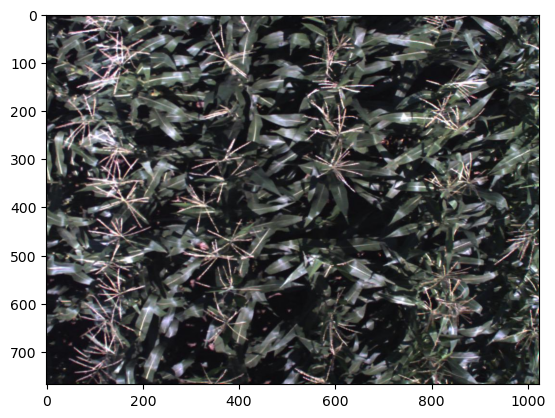

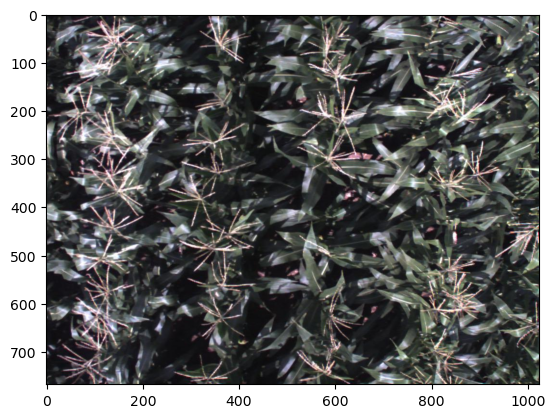

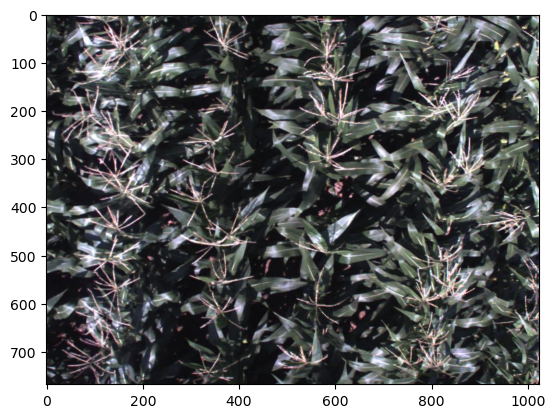

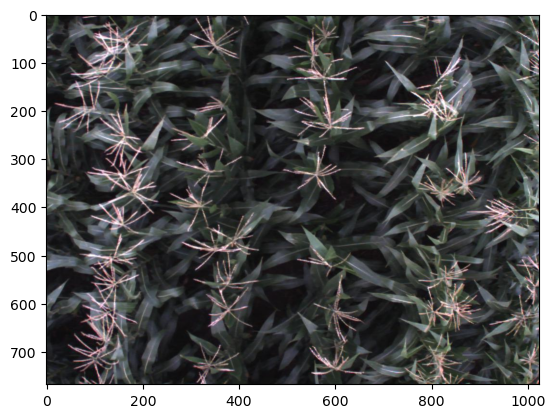

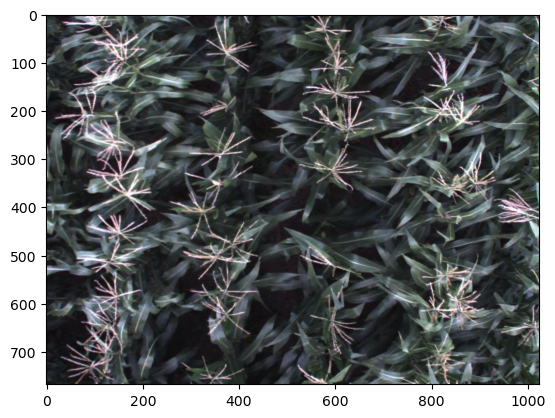

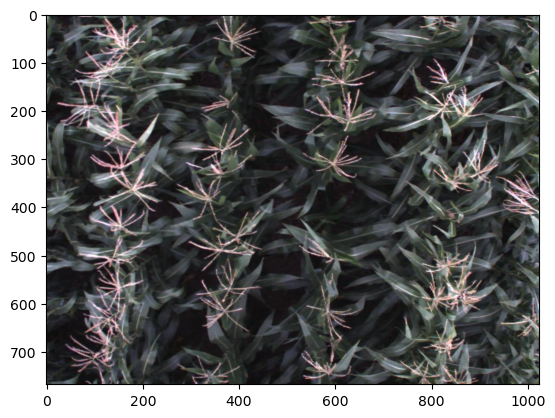

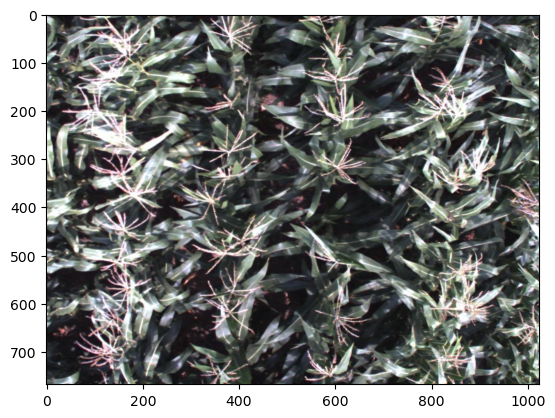

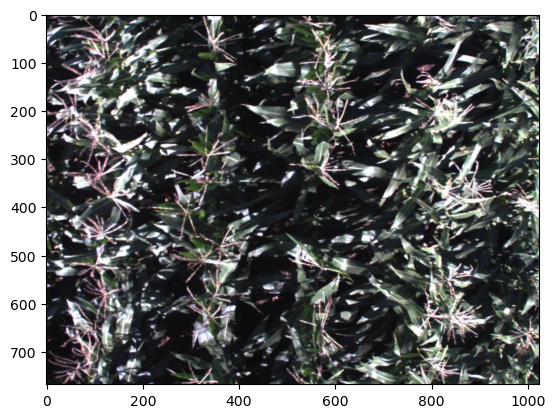

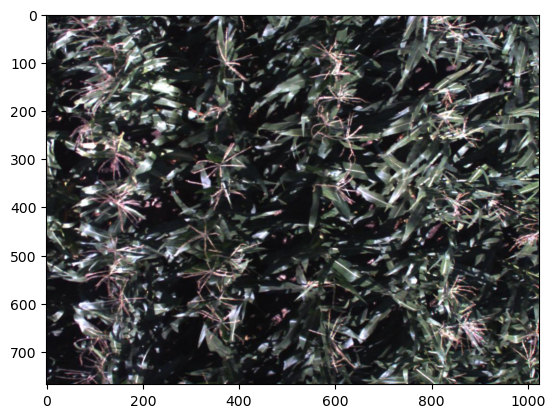

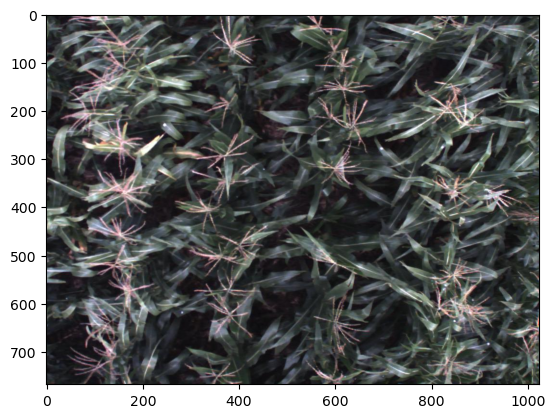

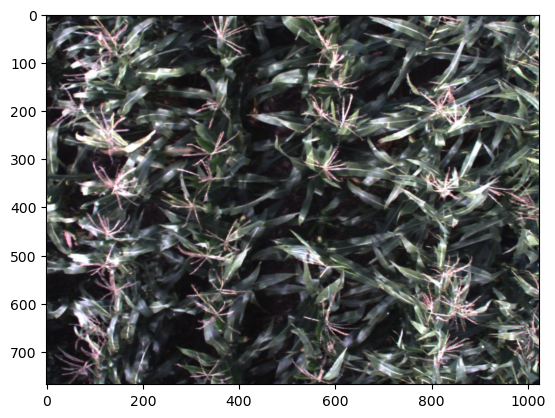

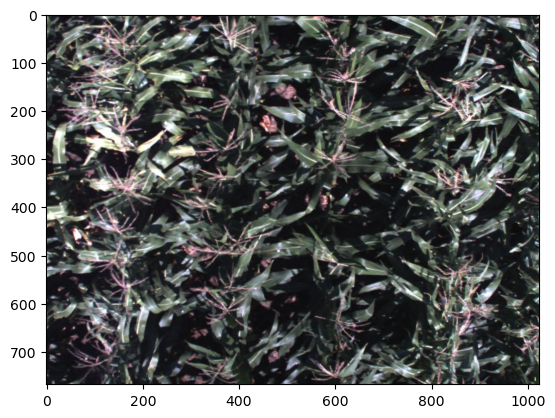

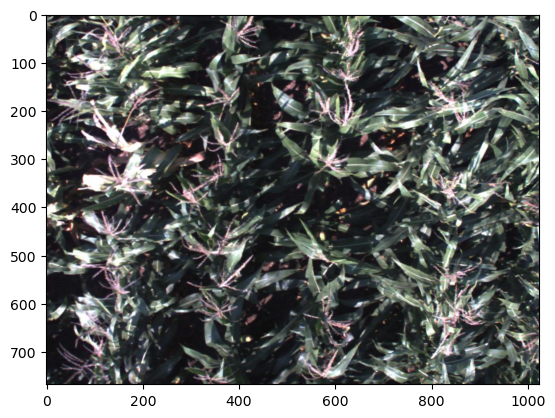

In [9]:
# read the images and plot them
read_images_0306 = read_all_images(all_im_files_0306, block_0306)

In [20]:
# for file in read_images_0306:
#     print(file.shape)

In [13]:
im_height = read_images_0306[0].shape[0]
im_width = read_images_0306[0].shape[1]
stride = 16
kernel_size = 100
n_channels = 3

In [14]:
# create the subwindow stack
stack_block_0306 = create_and_stack_subwindows(im_height, im_width, stride, kernel_size, n_channels, read_images_0306)

In [15]:
# examine the shape for this
stack_block_0306.shape

(3072, 13, 100, 100, 3)

In [16]:
# save the test data

In [17]:
np.save("data/test_input_sub_images/test_data_blk_0306.npy", stack_block_0306)

In [18]:
# sanity check
load_test_blk_0306 = np.load("data/test_input_sub_images/test_data_blk_0306.npy")
np.mean(load_test_blk_0306 == stack_block_0306)

1.0